In [25]:
using Pipe
using DataFrames
# using StatsPlots
using CSV
# using RollingFunctions
using Query
# using GLMakie

using JSON
using DataFrames
using Dates
using Colors
# using ColorSchemes
using Indicators

import Colors
using Plots
using Interact
using JuliaDB
using Interact
using Wavelets,WaveletsExt
using LinearAlgebra
# import Pkg; Pkg.add("ShiftedArrays")
# using ShiftedArrays
include("utils.jl")

window_slider (generic function with 1 method)

In [26]:
json_data_folder = "../user_data/data/binance"
json_filename = "BTC_USDT-1m.json"
json_filepath = "$json_data_folder/$json_filename"
f = open(json_filepath, "r")
json_data = JSON.parse(f)
close(f)

In [27]:
dfa = DataFrame(unix_time = Int64[], open=Float64[], high=Float64[], low=Float64[], close=Float64[], volume=Float64[])
for r in json_data push!(dfa, r) end
dfa.unix_time .= dfa.unix_time ./1000
# dfa.time .= unix2datetime.(dfa.unix_time)

insertcols!(dfa, :time => unix2datetime.(dfa.unix_time))
nrow(dfa)

129177

In [34]:
start_date = DateTime(2021, 5, 1)
end_date = DateTime(2021, 5, 27)
vdf = dfa[(dfa.time .>= start_date) .& (dfa.time .<= end_date) , :]
ut, tt, hh, ll, cc = vdf.unix_time, vdf.time, vdf.high, vdf.low, vdf.close
# h14max = [fill(vdf[1,:high],8-1)...,rollmax(vdf.high, 8)...]
#  length(h14max), length(vdf.close)
# hlc = [hh ll cc]
length(tt)

37441

In [29]:
ar = cc
# ema = Indicators.ema
# ema26 = ema(ar,n=26)
# ema50 = ema(ar,n=330)
# ema100 = ema(ar,n=100)
# ema200 = ema(ar,n=200)
# sma = Indicators.sma
# sma26 = sma(ar,n=26)
# sma50 = sma(ar,n=50)
# sma100 = sma(ar,n=100)
# sma200 = sma(ar,n=200)
# sma400 = sma(ar,n=400)
# sma800 = sma(ar,n=800)
1

1

In [30]:

function get_wavelet(ar, (m, perc, shift))
    fxt = calc_wavelet(ar, m)
    
    shifted_wave1 = (1 + perc/100) * 
        circshift(fxt , Int(trunc(m * shift)))

end

get_wavelet (generic function with 1 method)

In [31]:

function wavelet_sliders()
    
    m_slider = slider(1:200; label="m", default=50)
    perc_slider = slider(-5.0:0.05:5.0; label="%", default=0)
    shift_slider = slider(-1:0.05:1.0; label="shift", default=0)
    
    output = Interact.@map (&m_slider , &perc_slider, &shift_slider)
#     output = Interact.@map circshift(get_wavelet(ar, m)*(1+ perc/100), Int(trunc(m*shift)) )
    
    wdg = Widget(["m_slider" => m_slider, "perc_slider" => perc_slider, "shift_slider" => shift_slider], output = output)
    @layout! wdg hbox(:m_slider, :perc_slider, :shift_slider)
end

wavelet_sliders (generic function with 1 method)

In [32]:
wave1[][100]

LoadError: UndefVarError: wave1 not defined

In [33]:

arlen = length(ar)
wnd = window_slider(arlen)

rng = Observable{AbstractRange{Int64}}(1:1)
map!(wnd -> wnd[1]*wnd[2]:(wnd[1]+1)*wnd[2]-1, rng, wnd)

par = Interact.@map ar[&rng]

wave_slds_1 = wavelet_sliders()
wave_1 = Interact.@map get_wavelet(&par, &wave_slds_1) 


wave_slds_2 = wavelet_sliders()
wave_2 = Interact.@map get_wavelet(&par, &wave_slds_2) 

# wave1 = Interact.@map get_wavelet(&par, &wave_slds_1[:m_slider]) 

# shifted_wave1 = Interact.@map (1 + &wave_slds_1[:perc_slider]/100) * 
#     circshift(&wave1 , Int(trunc(&wave_slds_1[:m_slider] * &wave_slds_1[:shift_slider])))



plot_box = Observable{Any}(dom"div"())

function draw_it_all(zar, wave_1, wave_2)    
    plt = plot(zar, size=(1200,600), legend=nothing)
    plt1 = plot!(wave_1, lw=1.5)
    plt1 = plot!(wave_2, lw=1.5)
    dom"div"(plt1)
end

# function draw_it_all(ar, (m, perc, shift))
    
#     wave_ar = get_wavelet(ar, m)
#     plt = plot(ar, size=(1200,600), legend=nothing)
#     plt1 = plot!(circshift(wave_ar*(1+ perc/100), Int(trunc(m*shift)) ), color=:red)
#     dom"div"(plt1)
# end

map!(draw_it_all, plot_box, par, wave_1, wave_2)
# vline!([5,10])
# wndplot
ui = dom"div"(wnd, wave_slds_1, wave_slds_2, plot_box)

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Observable{Any} with 0 listeners. Value:
Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}()), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["2^n els/wnd"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 15, :default => 7.5, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :min => 1, :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
8, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnsmith/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnsmith/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnsmith/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/johnsmith/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/johnsmith/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000148099ee0, Task (runnable) @0x0000000148099ee0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\"],\"changes\":Web

In [36]:
ar=cc
mp = @manipulate for 
            s in slider(1:12000; label="s", default=7),
            m1 in slider(1:100; label="m", default=11)
#             m2 in slider(1:100; label="m", default=11)
    wsize = 2^9
    wstart = 1400 + s
    wend = wstart+wsize-1
    wrng = wstart:wend
    
    xar = ar[wrng]
    plot(xar, size=(1200,400),legend=nothing)
#     plot!(calc_wavelet(xar,16))
    wave_window_size = Int(wsize/2)
    
#     wave1 = calc_wavelet(xar[1:wave_window_size],2)
#     wave2 = calc_wavelet(xar[1:wave_window_size],1)
#     plot!(wave1)
#     plot!(wave2)
#     plot!(wave2, fillrange=wave2*0.99, fillalpha=0.05)
#     , fillranges=[0.995*wave1_ar,1.05*wave1_ar], fillalpha=0.01,
    wave1_ar = [last(calc_wavelet(ar[i-wave_window_size+1:i],m1, WT.haar)) for i in wrng]
    plot!(wave1_ar, lw=1.8)
    
#     wave2_ar = [last(calc_wavelet(ar[i-wave_window_size+1:i],m2, WT.haar)) for i in wrng]
#     plot!(wave2_ar)
    
#     wave3_ar = [last(calc_wavelet(ar[i-Int(wave_window_size/2)+1:i],5, WT.db6)) for i in wrng]
#     plot!(wave3_ar, fillranges=[0.995*wave1_ar,1.05*wave1_ar], fillalpha=0.01)
    
    vline!([Int(wsize/2)])
    
    
end 
mp

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 12000, :default => 7, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :min => 1, :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
6000, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnsmith/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnsmith/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnsmith/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/johnsmith/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/johnsmith/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001475a3640, Task (runnable) @0x00000001475a3640), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\"

In [ ]:
 [ (i,j, j/60, j/60/24) for (i,j) in [(i, 2^i) for i in 1:15]]

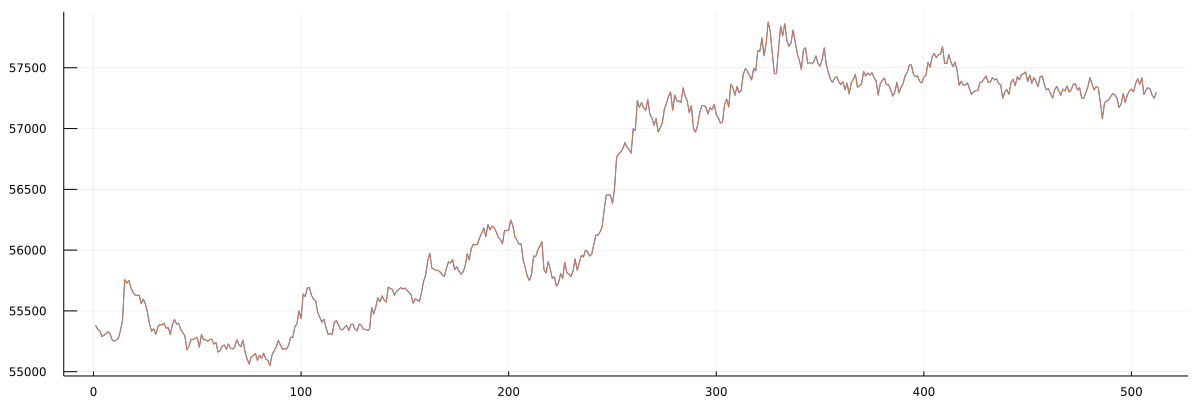

In [13]:
using WaveletsExt
s = 5000
# mp = @manipulate for 
#             s in slider(1:12000; label="s", default=7)
    wsize = 2^9
    wstart = 1400 + s
    wend = wstart+wsize-1
    wrng = wstart:wend
    
    xar = ar[wrng]

y = acwt(xar, wavelet(WT.haar))
z = iacwt(y)
#     y = wpd(xar, wavelet(WT.db4))

    plot(xar, size=(1200,400),legend=nothing)  
    plot!(z)
#     vline!([Int(wsize/2)])
    
    
# end 
# mp

In [14]:
y

512×10 Matrix{Float64}:
 1.27834e6  -1890.12    -1271.56    …  -328.348   -445.078   -666.126
 1.27834e6  -2042.28    -1416.24       -759.074   -701.165     -7.25138
 1.27834e6  -2193.41    -1559.75       -936.825   -248.241     12.2931
 1.27834e6  -2343.53    -1701.96       -861.987    -30.0475   -19.7
 1.27834e6  -2492.48    -1843.0        -517.943    -24.5525    -1.95869
 1.27834e6  -2640.26    -1982.82    …  -256.979      9.675     -0.873277
 1.27834e6  -2786.71    -2121.36        -92.2509    34.895     12.3072
 1.27834e6  -2931.9     -2258.6         -42.2377    18.8725    10.9107
 1.27834e6  -3075.77    -2394.45       -108.873    -19.1863   -13.336
 1.27834e6  -3218.32    -2528.69       -182.408    -39.0325    -7.09582
 1.27834e6  -3359.56    -2661.32    …  -237.721    -47.0988    -1.81726
 1.27834e6  -3499.43    -2792.43       -213.619    -85.2238   -18.1231
 1.27834e6  -3638.03    -2922.02       -119.186   -119.454     -8.09991
 ⋮                                  ⋱              

In [2]:
n = length(ar)
wnd = window_slider(20000)
rng = Observable{AbstractRange{Int64}}(1:1)
map!(wnd -> wnd[1]*wnd[2]:(wnd[1]+1)*wnd[2]-1, rng, wnd)
plt = Observables.@map plot(ar[&rng])
A = Observables.@map length(&rng) > 2 ? heatmap(wplotim(ar[&rng])) : nothing
hbox(plt,A)

LoadError: UndefVarError: ar not defined

In [ ]:
length(1:3)

In [ ]:
length(ar)